In [1]:
# import models
import Predictor
import Clip
import VQVAE
import torch
from timm.models import create_model
from BridgeDataset import BridgeDataV1

dataset = BridgeDataV1(target_range=range(5,10))

/mnt/cache/share/spring/conda_envs/miniconda3/envs/s0.3.5/lib/python3.7/site-packages/torchvision/transforms/transforms.py:333: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "


In [2]:
text_encoder = create_model("clip_model", device = "cpu")

Some weights of the model checkpoint at /mnt/lustre/share_data/liujihao/clip-vit-large-patch14 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.1.self_attn.out_proj.weight', 'vision_model.encoder.layers.3.self_attn.out_proj.bias', 'vision_model.encoder.layers.5.mlp.fc2.bias', 'vision_model.encoder.layers.18.self_attn.out_proj.bias', 'vision_model.encoder.layers.3.layer_norm1.weight', 'vision_model.encoder.layers.5.self_attn.q_proj.bias', 'vision_model.encoder.layers.9.self_attn.out_proj.bias', 'vision_model.encoder.layers.15.self_attn.q_proj.weight', 'vision_model.encoder.layers.2.self_attn.q_proj.weight', 'vision_model.encoder.layers.19.layer_norm1.bias', 'vision_model.encoder.layers.12.layer_norm2.bias', 'vision_model.encoder.layers.22.mlp.fc2.bias', 'vision_model.encoder.layers.13.self_attn.k_proj.bias', 'vision_model.encoder.layers.15.self_attn.out_proj.bias', 'vision_model.encoder.layers.20.layer_norm1.bias', 'vision_model.encoder.layers.23.layer_norm2.

In [3]:
model = create_model("translator_kl_base")
vqvae = create_model("VQVAE", name="vq-8-n256")
ckpt = torch.load("/mnt/lustre/zhengjinliang/vision-language-model/frame_predictor/EXP/KL_100ep/checkpoint.pth", map_location="cpu")
model.load_state_dict(ckpt['model'])


making attention of type 'vanilla' with 512 in_channels
making attention of type 'vanilla' with 512 in_channels
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 4, 32, 32) = 4096 dimensions.
making attention of type 'vanilla' with 512 in_channels
making attention of type 'vanilla' with 512 in_channels
making attention of type 'vanilla' with 512 in_channels
making attention of type 'vanilla' with 512 in_channels


<All keys matched successfully>

tensor(132)


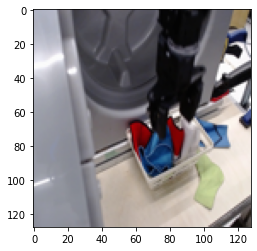

In [26]:
import random
import matplotlib.pyplot as plt
idx = random.randint(1, 10000)
samples, targets, text = dataset[idx]
plt.imshow(samples.squeeze().permute(1, 2, 0).detach().numpy())
samples = samples.unsqueeze(0)
init_token,_,(_,_,ind) = vqvae.encode(samples)
_, _, (_,_,tar_id) = vqvae.encode(targets.unsqueeze(0))
text_feature = text_encoder([text])
init_token.shape
print(sum(tar_id==ind))


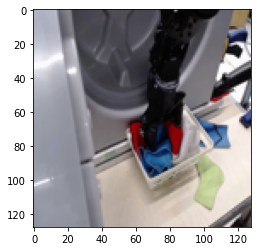

In [27]:
plt.imshow(targets.squeeze().permute(1, 2, 0).detach().numpy())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(213)


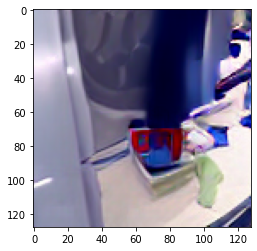

In [28]:
pred_token = model(ind, text_feature)
print(sum(pred_token.max(-1).indices == ind))
token = vqvae.quantize.embedding(pred_token.max(-1).indices)
out = vqvae.decode(token.view(1, 16, 16, 4).permute(0, 3, 1, 2))
plt.imshow(out.squeeze().permute(1, 2, 0).detach().numpy())


tensor(256)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


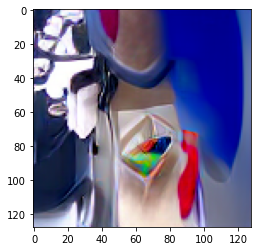

In [24]:
p_token = pred_token.max(-1).indices
pred_token = model(p_token, text_feature)
print(sum(p_token == pred_token.max(-1).indices))
token = vqvae.quantize.embedding(pred_token.max(-1).indices)
out = vqvae.decode(token.view(1, 16, 16, 4).permute(0, 3, 1, 2))
plt.imshow(out.squeeze().permute(1, 2, 0).detach().numpy())


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


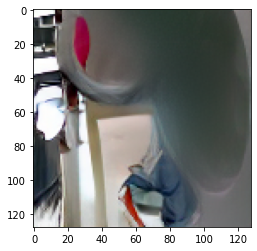

In [133]:


pred_token = model(init_token, text_feature)

out = vqvae.decode(vqvae.quantize.embedding(vqvae.get_ind(pred_token)).view(1, 16, 16, 4).permute(0, 3, 1, 2))
plt.imshow(out.squeeze().permute(1, 2, 0).detach().numpy())


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


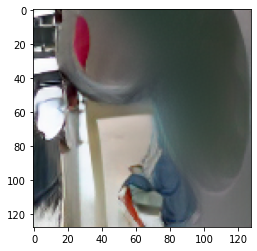

In [135]:


pred_token = model(init_token, text_feature)

out = vqvae.decode(pred_token)
plt.imshow(out.squeeze().permute(1, 2, 0).detach().numpy())


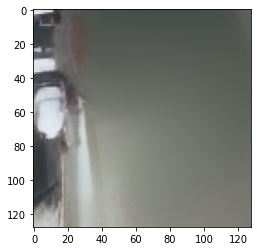

In [137]:
pred_token = model(pred_token, text_feature)
out = vqvae.decode(pred_token)
plt.imshow(out.squeeze().permute(1, 2, 0).detach().numpy())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


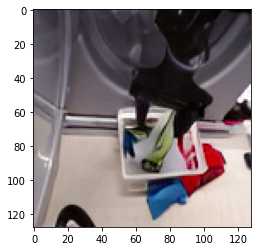

In [62]:
pred_token = model(pred_token, text_feature)
out = vqvae.decode(pred_token)
plt.imshow(out.squeeze().permute(1, 2, 0).detach().numpy())


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


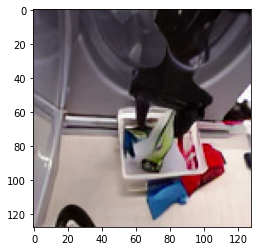

In [63]:
pred_token = model(pred_token, text_feature)
out = vqvae.decode(pred_token)
plt.imshow(out.squeeze().permute(1, 2, 0).detach().numpy())


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


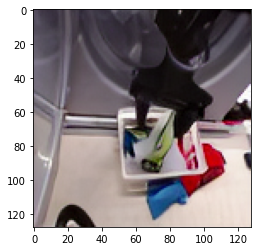

In [64]:
pred_token = model(pred_token, text_feature)
out = vqvae.decode(pred_token)
plt.imshow(out.squeeze().permute(1, 2, 0).detach().numpy())


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


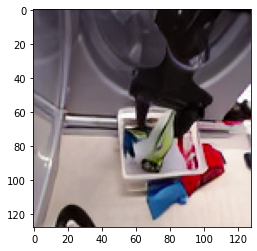

In [65]:
pred_token = model(pred_token, text_feature)
out = vqvae.decode(pred_token)
plt.imshow(out.squeeze().permute(1, 2, 0).detach().numpy())


In [67]:
e = torch.nn.Embedding(10, 100)
s = e(torch.Tensor([1,2,3]).long())

In [68]:
s.shape

torch.Size([3, 100])